In [1]:
# Importing the data file and creating a pandas df
from google.colab import files
uploaded = files.upload()

Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [2]:
# Loading dataset containing tweets from the year 2017-2022

import pandas as pd
import numpy as np

df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')
df_2021 = pd.read_csv('2021.csv')
df_2022 = pd.read_csv('2022.csv')

In [3]:
# Checking tweets by language
df_2017.shape
df_2017.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 95.42%

,language,tweet
4,en,3022
17,und,111
7,fr,6
9,in,4
5,es,4


In [4]:
print(df_2018.shape)
df_2018.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 88.57

(2285, 39)


,language,tweet
3,en,2024
18,und,192
17,tl,19
11,in,9
2,de,7


In [5]:
print(df_2019.shape)
df_2019.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 90.29%

(8312, 39)


,language,tweet
5,en,7505
30,und,586
28,tl,54
10,fr,29
14,in,20


In [6]:
print(df_2020.shape)
df_2020.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 88.93%

(11717, 39)


,language,tweet
5,en,10420
31,und,954
29,tl,100
10,fr,37
4,de,30


In [7]:
print(df_2021.shape)
df_2021.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 82.31%

(3115, 36)


,language,tweet
7,en,2564
29,und,448
26,tl,32
5,de,14
8,es,9


In [8]:
print(df_2022.shape)
df_2022.groupby(["language"], as_index=False)["tweet"].count().sort_values("tweet", ascending=False).head()
# 76.26%

(1028, 36)


,language,tweet
2,en,784
10,und,220
3,fr,6
4,in,4
0,ca,2


In [ ]:
df_2022[df_2022["language"]=="en"]["tweet"]
### As majority of the tweets are in the english language, we can proceed ahead and include stopwords belonging to all languages

0          @SpacePadreIsle In a way, this is free QA haha
1                @teslaownersSV A beautiful home for life
2       @SpacePadreIsle Some Starlink terminals near c...
3                      @RationalEtienne @RogerYar Exactly
4       @RogerYar All news sources are partially propa...
                              ...                        
1020    @jack Reminds me of when I hex edited Ultima V...
1021    @ClaudioOmbrella @Tesla @slcuervo @alex_avoigt...
1022    @auren There is no way to be in touch with vot...
1024                  Let’s make the roaring 20’s happen!
1025                  Great work by Tesla team worldwide!
Name: tweet, Length: 784, dtype: object

# Cleaning data

In [9]:
### Storing all dfs in a list to automate transformations
all_variables = dir()
tables = []
for var in all_variables:
  if var.startswith("df_20"):
    tables.append(var)

tables

['df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021', 'df_2022']

In [10]:
# Keeping only the required columns

for df in tables:
  exec(f'{df} = {df}[["tweet", "language"]]')

tables

['df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021', 'df_2022']

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re

# Removing '#', '@', links, emojis, and punctuations. Converting to lower case and removing extra whitespaces.

for df in tables:
  tweet_list = []
  exec(f"""for tweet in list({df}['tweet']):
    tweet_cleaned = ' '.join(word for word in tweet.split(' ') if not word.startswith('#'))
    tweet_cleaned = ' '.join(word for word in tweet_cleaned.split(' ') if not word.startswith('@'))
    tweet_cleaned = ' '.join(word for word in tweet_cleaned.split(' ') if not word.startswith('http://'))
    tweet_cleaned = ' '.join(word for word in tweet_cleaned.split(' ') if not word.startswith('https://'))
    tweet_cleaned   =  re.sub(r'[^a-zA-Z]+', ' ', tweet_cleaned, 0, re.IGNORECASE)
    tweet_list.append(tweet_cleaned)
    tweet_list = [word.lower().strip() for word in tweet_list]
    for text in tweet_list:
      if text=='':
        tweet_list.remove(text)
    tweet_list_{df} = tweet_list.copy()""")

# Computing word frequency after removing stop words

In [12]:
### Merging all elements in the tweets by year into one doc/paragraph - string format

all_variables = dir()
tweet_lst = []
for var in all_variables:
  if var.startswith("tweet_list_df_20"):
    tweet_lst.append(var)

print(tweet_lst)

['tweet_list_df_2017', 'tweet_list_df_2018', 'tweet_list_df_2019', 'tweet_list_df_2020', 'tweet_list_df_2021', 'tweet_list_df_2022']


In [13]:
for lst in tweet_lst:
  exec(f"""tweet_doc_containing_{lst} = ' '.join([str(elem) for elem in {lst}])""")

In [14]:
# # Previewing the combined tweet text for 2017 - for reference and validation
# tweet_doc_containing_tweet_list_df_2017

In [15]:
# Importing required packages
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
### storing all string text doc variables in a list for dynamic transformation
all_variables = dir()
tweet_docs = []
for var in all_variables:
  if var.startswith("tweet_doc_containing_tweet_list_df_20"):
    tweet_docs.append(var)

tweet_docs

['tweet_doc_containing_tweet_list_df_2017',
 'tweet_doc_containing_tweet_list_df_2018',
 'tweet_doc_containing_tweet_list_df_2019',
 'tweet_doc_containing_tweet_list_df_2020',
 'tweet_doc_containing_tweet_list_df_2021',
 'tweet_doc_containing_tweet_list_df_2022']

In [17]:
### Getting the list of tokens
for doc in tweet_docs:
  exec(f"tweet_tokens_{doc[-4:]} = nltk.word_tokenize({doc})")

In [18]:
# # Previewing the tokens for 2019
# print(tweet_tokens_2019)
# len(tweet_tokens_2019)

In [19]:
### Creating token list for each year for dynamic transformation
all_variables = dir()
tweet_tokens = []
for var in all_variables:
  if var.startswith("tweet_tokens_20"):
    tweet_tokens.append(var)

tweet_tokens

['tweet_tokens_2017',
 'tweet_tokens_2018',
 'tweet_tokens_2019',
 'tweet_tokens_2020',
 'tweet_tokens_2021',
 'tweet_tokens_2022']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
### Removing stopwords
### Including stopwords from all languages as tweets are sometimes made in other languages
stop_words = set(stopwords.words())
# print(stop_words)
for tokens in tweet_tokens:
  exec(f"""{tokens}_wo_sw = []
for word in {tokens}:
    if word not in stop_words:
      {tokens}_wo_sw.append(word)""")

In [22]:
# ### Previweing 2017 token list without stop words
# print(tweet_tokens_2017_wo_sw)
# len(tweet_tokens_2017_wo_sw)

In [23]:
### Creating a list of tokens without stopwords by year for dynamic transformation
all_variables = dir()
tweet_tokens_wo_sw = []
for var in all_variables:
  if var.startswith("tweet_tokens_20") and var.endswith("wo_sw"):
    tweet_tokens_wo_sw.append(var)

tweet_tokens_wo_sw

['tweet_tokens_2017_wo_sw',
 'tweet_tokens_2018_wo_sw',
 'tweet_tokens_2019_wo_sw',
 'tweet_tokens_2020_wo_sw',
 'tweet_tokens_2021_wo_sw',
 'tweet_tokens_2022_wo_sw']

In [24]:
### using counter to get frequency of each word for tweets
from collections import Counter

for tokens in tweet_tokens:
  exec(f"""tweetWords = Counter({tokens})
word_freq_{tokens[-4:]} = pd.DataFrame(tweetWords.items(),columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)""")

In [25]:
### using counter to get frequency of each word for tweets without stopwords
import collections
for tokens in tweet_tokens_wo_sw:
  exec(f"""tweetWords = collections.Counter({tokens})
word_freq_{tokens[-10:-6]}_wo_sw = pd.DataFrame(tweetWords.items(),columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)""")

In [26]:
# Previewing the word frequency df for 2018
word_freq_2018

,word,frequency
7,to,878
11,the,742
37,a,675
120,is,566
28,amp,527
...,...,...
2959,tickles,1
2960,grimoire,1
2961,joined,1
2962,fellowship,1


In [27]:
### Word frequency dataframe after excluding stopwords
word_freq_2018_wo_sw

,word,frequency
15,amp,527
0,tesla,292
90,car,121
103,model,98
22,great,62
...,...,...
2921,dancing,1
1163,insults,1
1162,yell,1
2925,cuff,1


# Top 10 words for each year

In [28]:
### Using dense rank to compute rank by frequency (for df without stopwords)
for i in range(2017,2023):
  exec(f"word_freq_{i}_wo_sw['freq_rank'] = word_freq_{i}_wo_sw.frequency.rank(method='dense', ascending=False).astype(int)")

In [29]:
### Calculating frequency as a fraction - tf = (frequency of the word in the year)/(total words in all tweets in the year)
for i in range(2017,2023):
  exec(f"word_freq_{i}_wo_sw['p_frequency'] = word_freq_{i}_wo_sw['frequency']/len(tweet_tokens_{i})")

In [30]:
### Getting the top 10 most frequent words by year
for i in range(2017,2023):
  print()
  print('--------------', i, '--------------')
  exec(f"""print(word_freq_{i}_wo_sw[word_freq_{i}_wo_sw.freq_rank<=10][['word','frequency','p_frequency']])""")


-------------- 2017 --------------
       word  frequency  p_frequency
78    tesla        312     0.007437
88      amp        219     0.005220
42    model        208     0.004958
139  rocket        149     0.003551
135  launch        112     0.002670
136  falcon         99     0.002360
373     car         99     0.002360
308    time         96     0.002288
481   great         85     0.002026
326  spacex         80     0.001907
12     cars         77     0.001835

-------------- 2018 --------------
           word  frequency  p_frequency
15          amp        527     0.016384
0         tesla        292     0.009078
90          car        121     0.003762
103       model         98     0.003047
22        great         62     0.001928
661        make         60     0.001865
29         time         59     0.001834
274        work         55     0.001710
363        cars         55     0.001710
627        love         54     0.001679
355  production         48     0.001492

-------------- 

# Histogram of word frequencies for each year

[Text(0.5, 1.0, 'Word frequency histogram for the year 2022')]

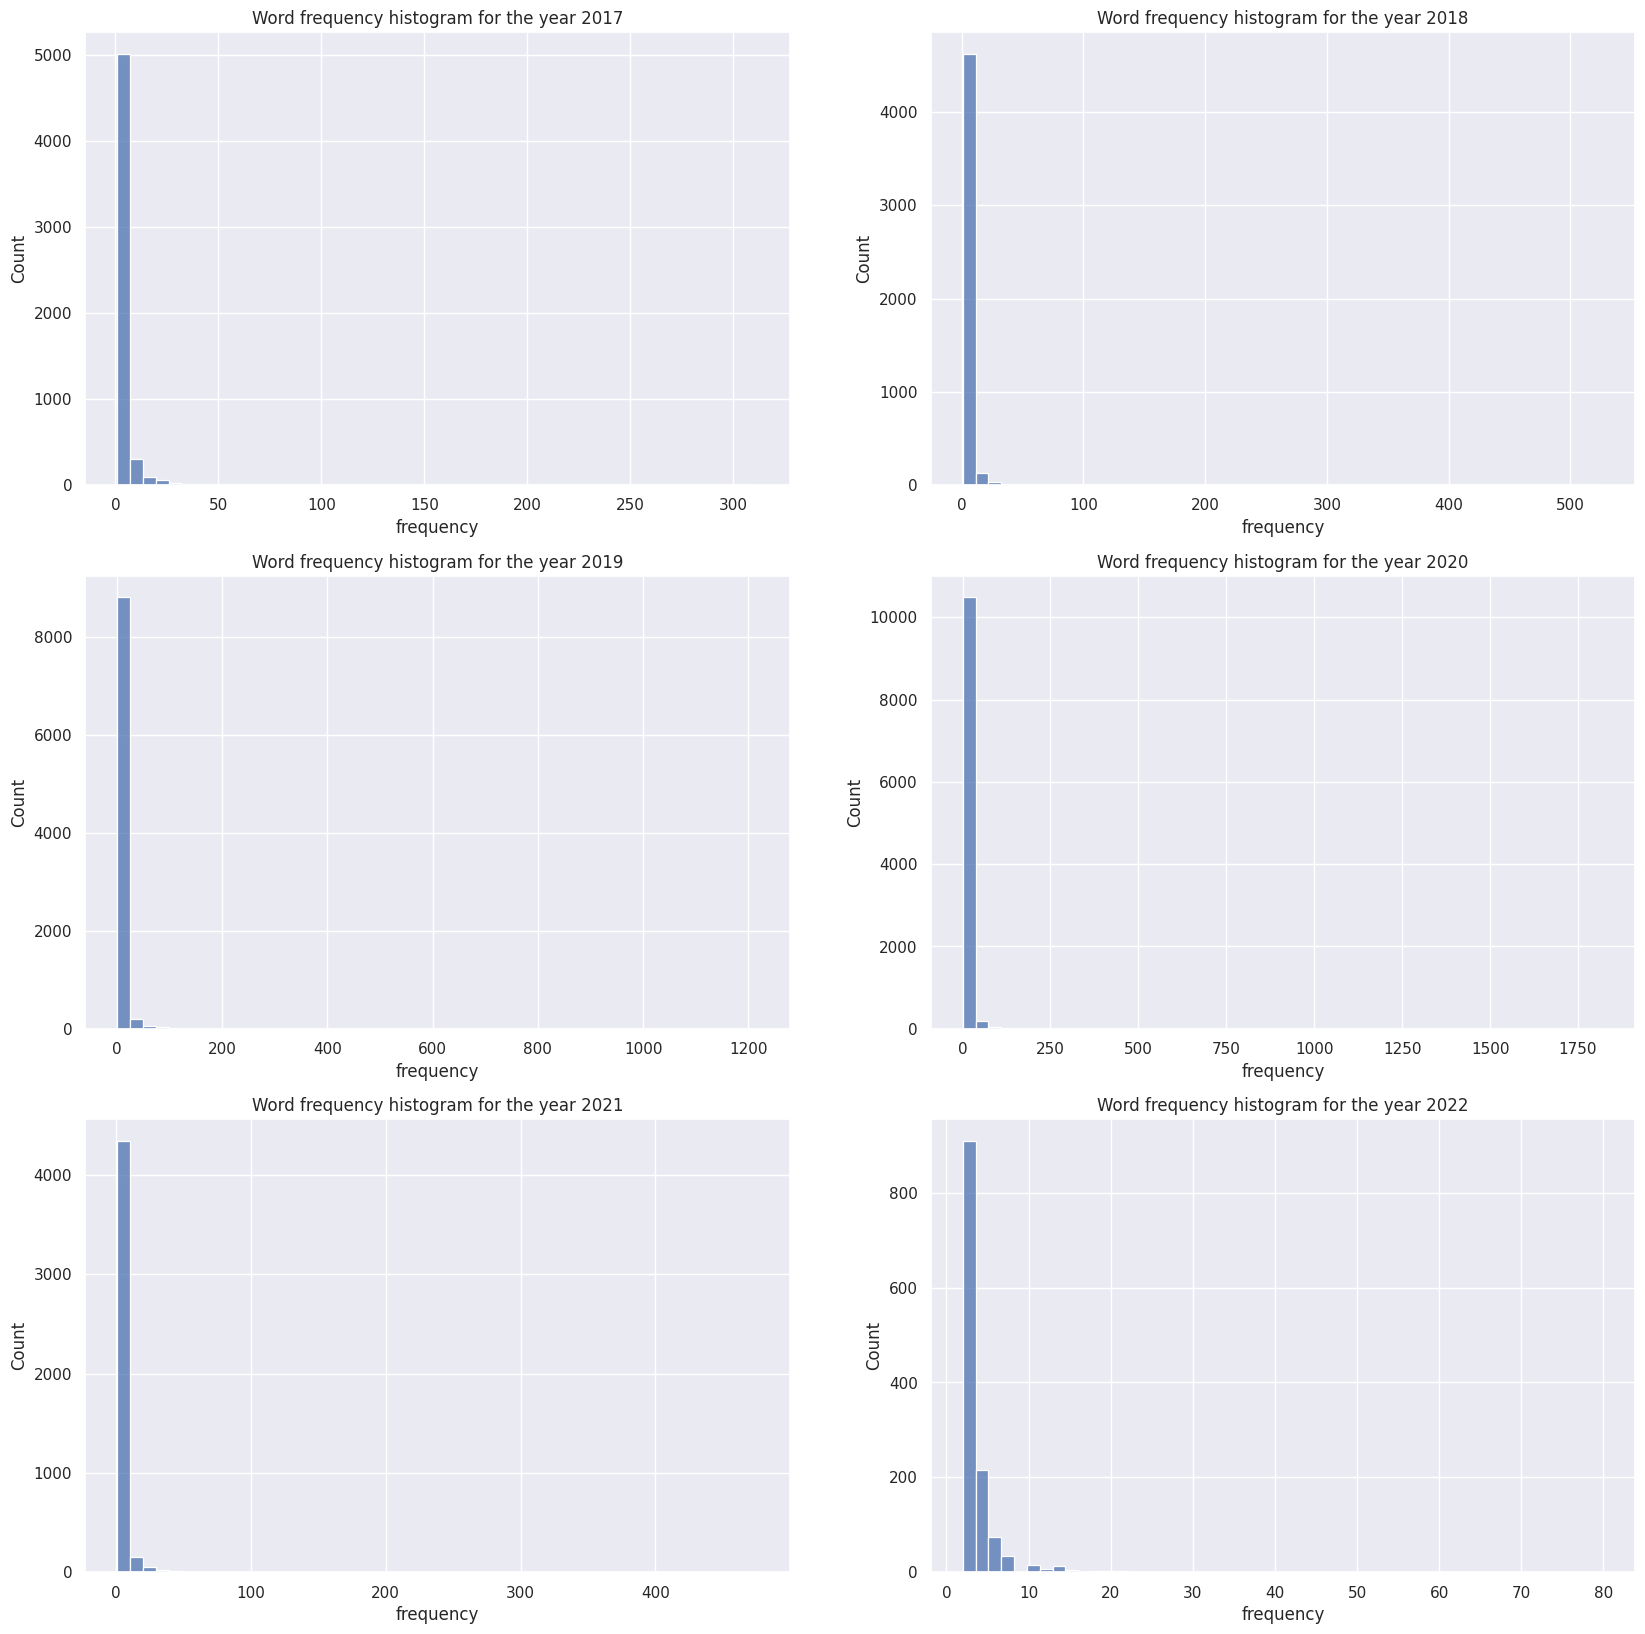

In [31]:
import os
import sys
import string
import argparse
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,20)})
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.histplot(x='frequency', data=word_freq_2017_wo_sw, bins=50, ax=axs[0][0]).set(title='Word frequency histogram for the year 2017')
sns.histplot(x='frequency', data=word_freq_2018_wo_sw, bins=50, ax=axs[0][1]).set(title='Word frequency histogram for the year 2018')
sns.histplot(x='frequency', data=word_freq_2019_wo_sw, bins=50, ax=axs[1][0]).set(title='Word frequency histogram for the year 2019')
sns.histplot(x='frequency', data=word_freq_2020_wo_sw, bins=50, ax=axs[1][1]).set(title='Word frequency histogram for the year 2020')
sns.histplot(x='frequency', data=word_freq_2021_wo_sw, bins=50, ax=axs[2][0]).set(title='Word frequency histogram for the year 2021')
sns.histplot(x='frequency', data=word_freq_2022_wo_sw, bins=50, ax=axs[2][1]).set(title='Word frequency histogram for the year 2022')

<Figure size 2000x2000 with 0 Axes>

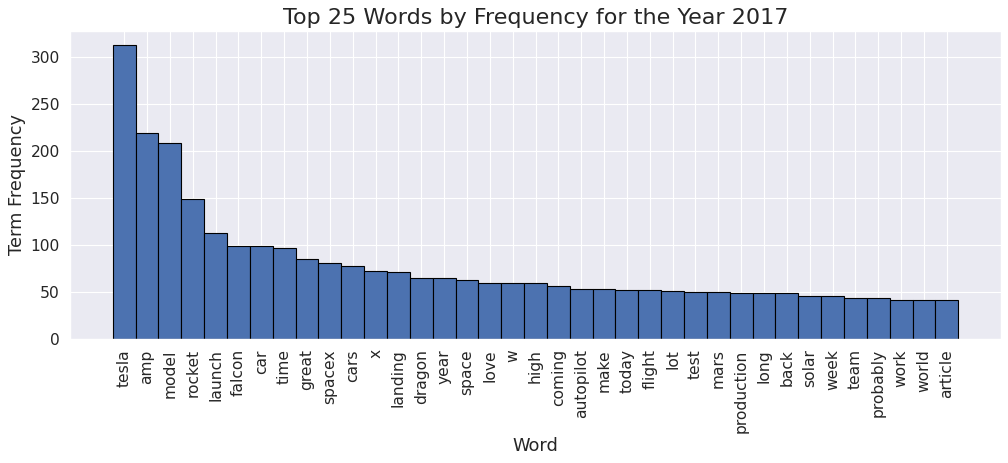

<Figure size 2000x2000 with 0 Axes>

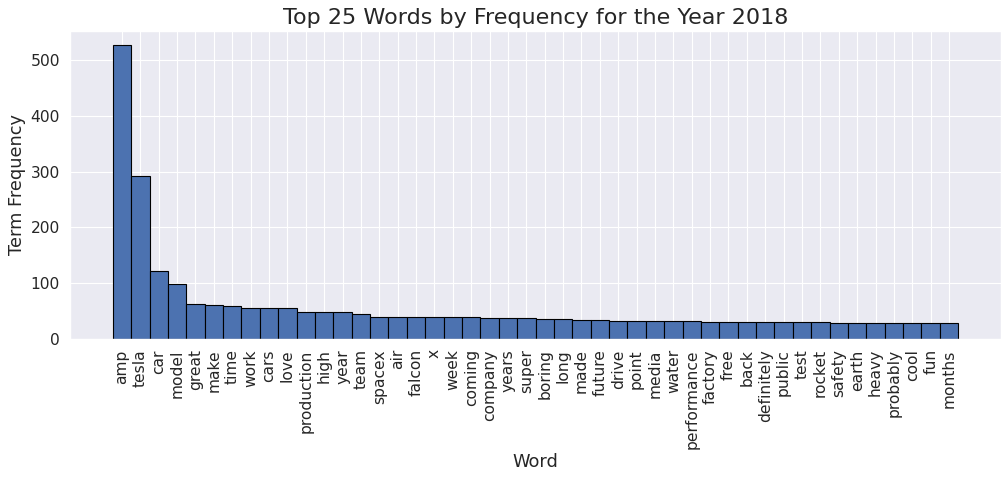

<Figure size 2000x2000 with 0 Axes>

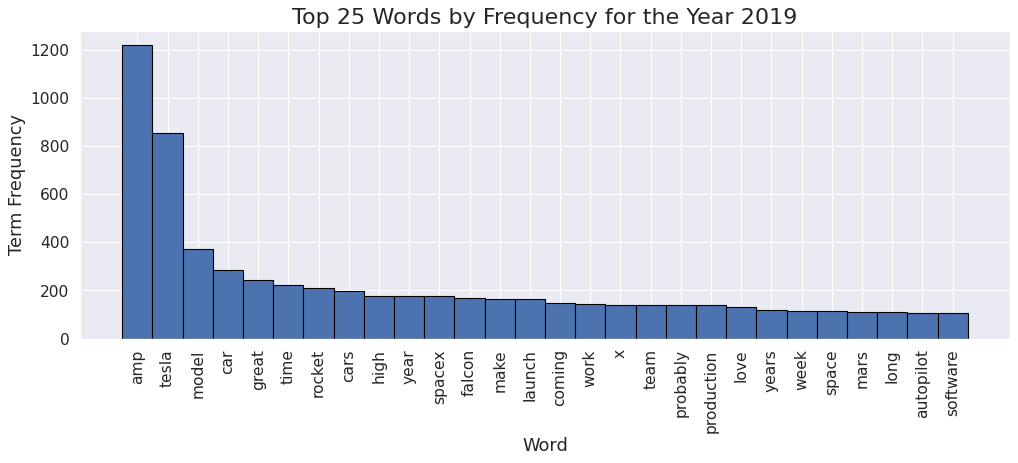

<Figure size 2000x2000 with 0 Axes>

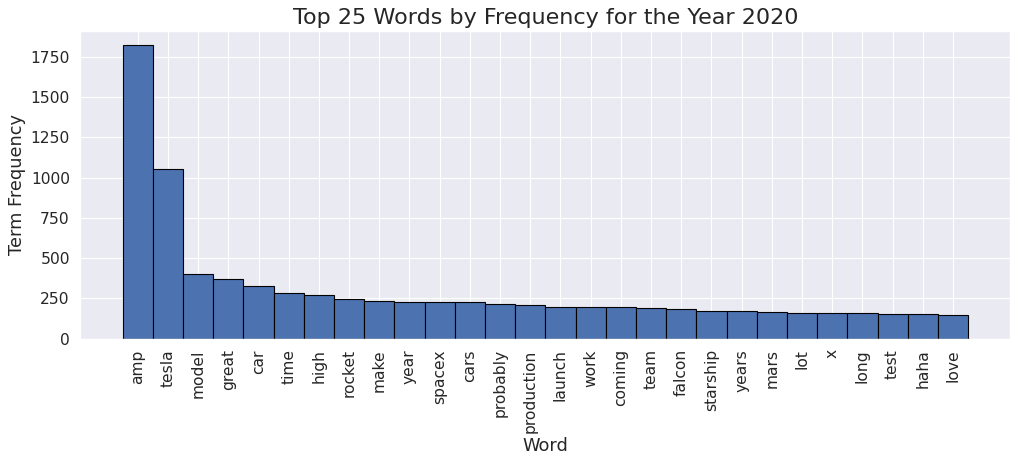

<Figure size 2000x2000 with 0 Axes>

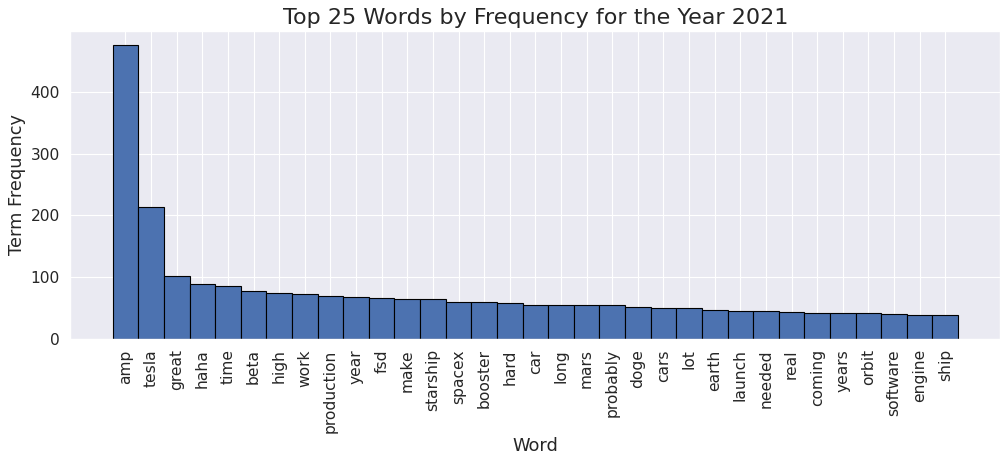

<Figure size 2000x2000 with 0 Axes>

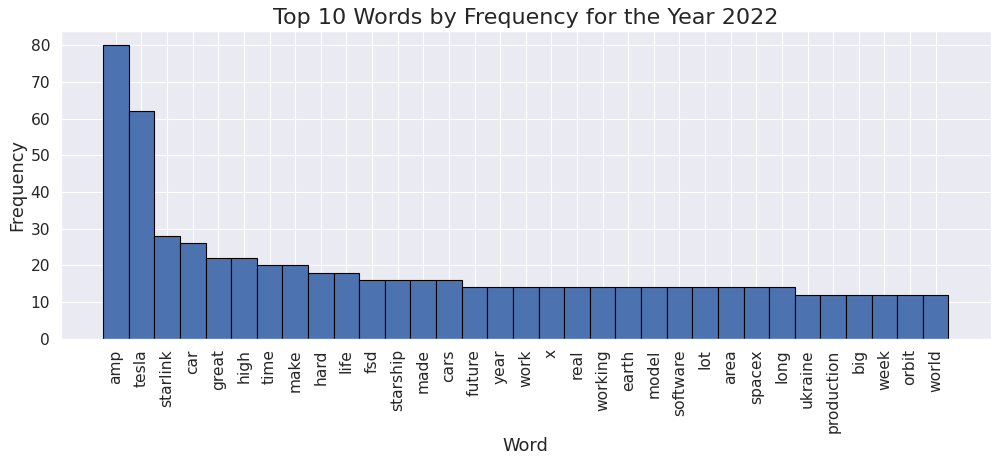

In [32]:
### Visualizing the top most frequent words as follows:

for i in range(2017, 2023):
  exec(f"""
if i!=2022:
  xticklabels = word_freq_{i}_wo_sw['word']
  indices = np.arange(len(word_freq_{i}_wo_sw['word'][word_freq_{i}_wo_sw['freq_rank']<=25]))
  width = 1
  fig = plt.figure()
  figure(figsize=(15, 5), dpi=80)
  plt.title('Top 25 Words by Frequency for the Year {i}', fontsize=20)
  plt.xlabel('Word', fontsize=16)
  plt.ylabel('Term Frequency', fontsize=16)
  plt.bar(indices, word_freq_{i}_wo_sw['frequency'][word_freq_{i}_wo_sw['freq_rank']<=25], width, edgecolor = 'black', align='edge')
  plt.xticks(indices + width * 0.5, word_freq_{i}_wo_sw['word'][word_freq_{i}_wo_sw['freq_rank']<=25], rotation='vertical', fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()
else:
  xticklabels = word_freq_{i}_wo_sw['word']
  indices = np.arange(len(word_freq_{i}_wo_sw['word'][word_freq_{i}_wo_sw['freq_rank']<=10]))
  width = 1
  fig = plt.figure()
  figure(figsize=(15, 5), dpi=80)
  plt.title('Top 10 Words by Frequency for the Year {i}', fontsize=20)
  plt.xlabel('Word', fontsize=16)
  plt.ylabel('Frequency', fontsize=16)
  plt.bar(indices, word_freq_{i}_wo_sw['frequency'][word_freq_{i}_wo_sw['freq_rank']<=10], width, edgecolor = 'black', align='edge')
  plt.xticks(indices + width * 0.5, word_freq_{i}_wo_sw['word'][word_freq_{i}_wo_sw['freq_rank']<=10], rotation='vertical', fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()""")

# Using Zipf's law and plotting log-log plot of word frequencies and rank

In [33]:
### Considering all words in the year and creating rank by frequency values

for i in range(2017,2023):
  exec(f"word_freq_{i}['freq_rank'] = word_freq_{i}.frequency.rank(method='dense', ascending=False).astype(int)")

In [34]:
### Sorting frequency in descending order and generating rank
for i in range(2017,2023):
  exec(f"""word_freq_{i}=word_freq_{i}.reset_index()
word_freq_{i}=word_freq_{i}.drop(['index'], axis=1)
word_freq_{i}['rank'] = word_freq_{i}.index + 1""")

In [35]:
### Sorting frequency in descending order and generating rank
for i in range(2017,2023):
  exec(f"""word_freq_{i}_wo_sw=word_freq_{i}_wo_sw.reset_index()
word_freq_{i}_wo_sw=word_freq_{i}_wo_sw.drop(['index'], axis=1)
word_freq_{i}_wo_sw['rank'] = word_freq_{i}_wo_sw.index + 1""")

In [36]:
# Previewing the word frequency table for 2018
word_freq_2018.head()

,word,frequency,freq_rank,rank
0,to,878,1,1
1,the,742,2,2
2,a,675,3,3
3,is,566,4,4
4,amp,527,5,5


In [37]:
word_freq_2018_wo_sw.head()

,word,frequency,freq_rank,p_frequency,rank
0,amp,527,1,0.016384,1
1,tesla,292,2,0.009078,2
2,car,121,3,0.003762,3
3,model,98,4,0.003047,4
4,great,62,5,0.001928,5


## log-log plots considering all words (including stop words)

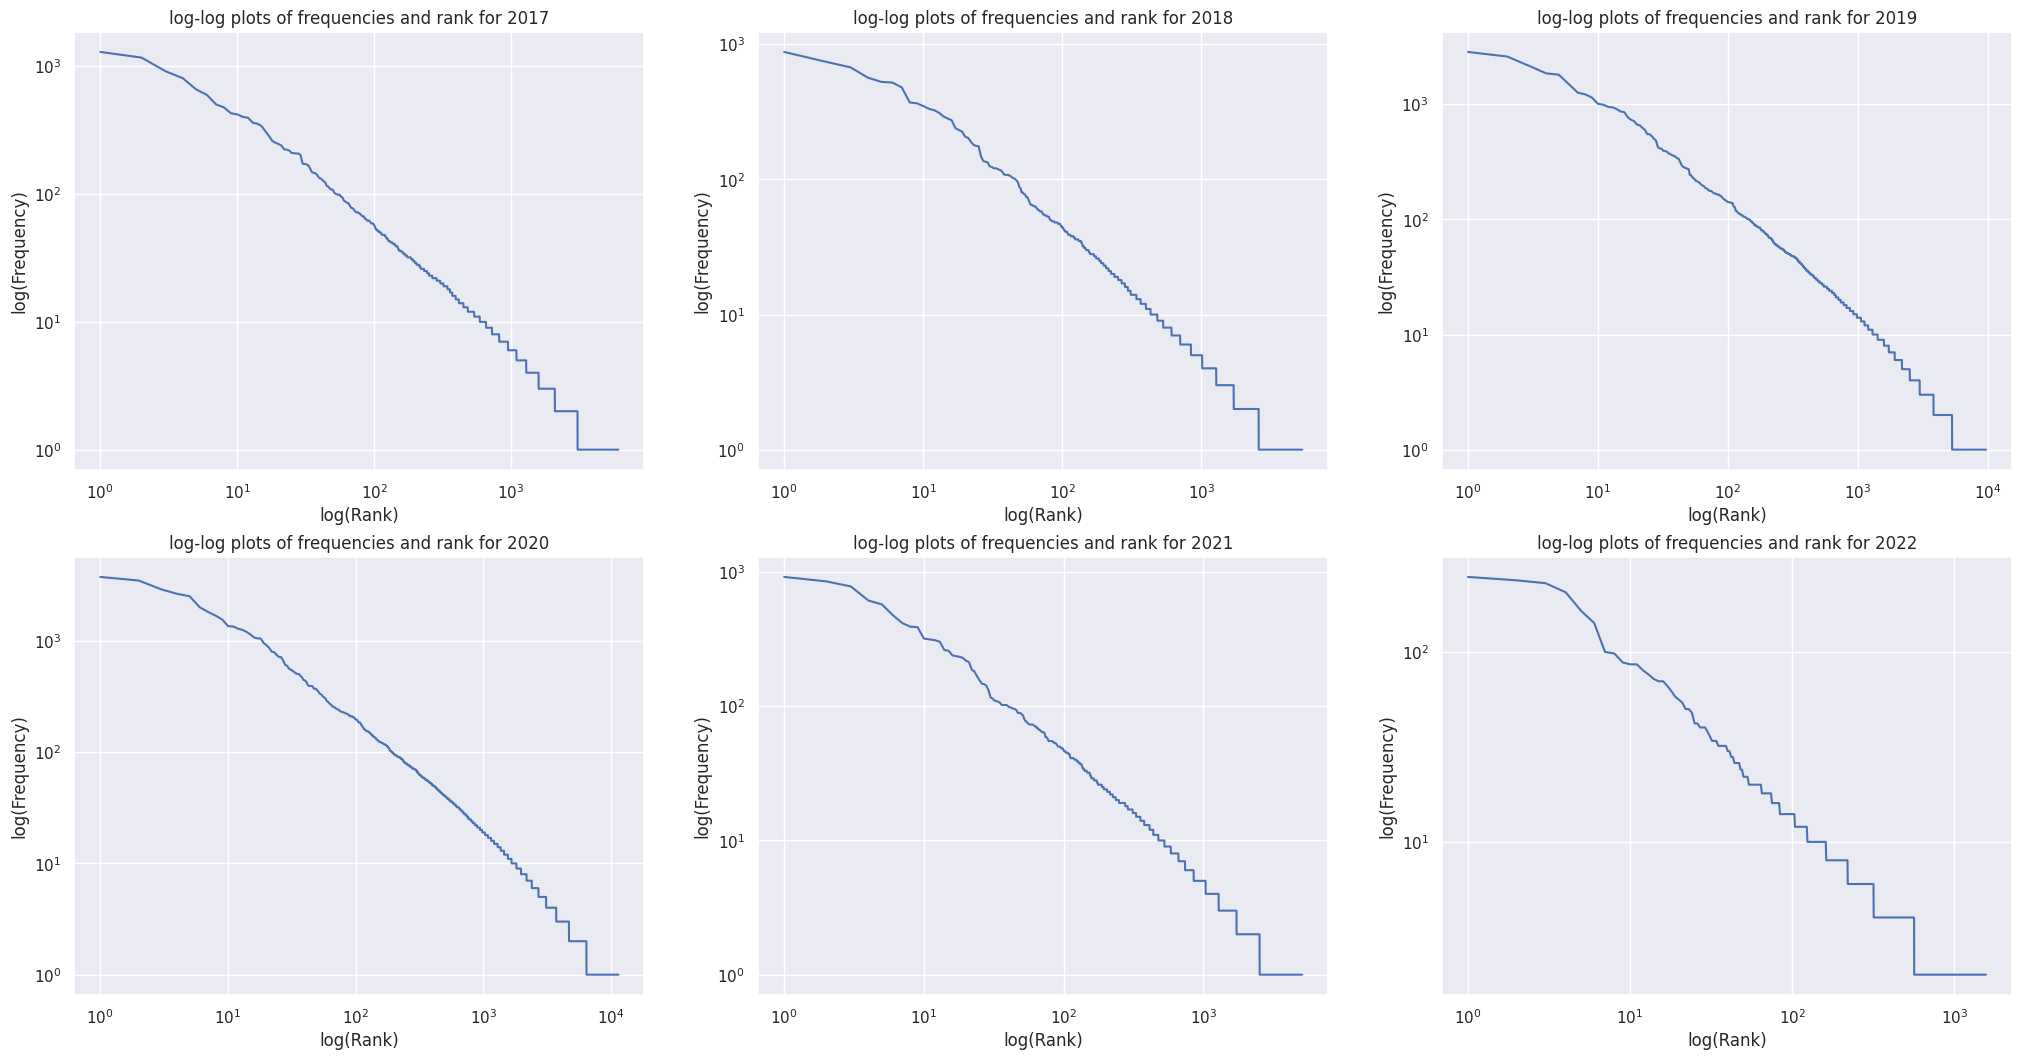

In [38]:
import matplotlib.gridspec as gridspec

# Creating 2x3 sub plots
gs = gridspec.GridSpec(2, 3)

plt.figure(figsize=(25,12.5))
ax = plt.subplot(gs[0, 0])
plt.plot(word_freq_2017['rank'], word_freq_2017['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2017', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[0, 1])
plt.plot(word_freq_2018['rank'], word_freq_2018['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2018', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[0, 2])
plt.plot(word_freq_2019['rank'], word_freq_2019['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2019', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 0])
plt.plot(word_freq_2020['rank'], word_freq_2020['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2020', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 1])
plt.plot(word_freq_2021['rank'], word_freq_2021['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2021', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 2])
plt.plot(word_freq_2022['rank'], word_freq_2022['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2022', fontsize=12)
plt.xscale('log')
plt.yscale('log')

## log-log plots considering words without stopwords

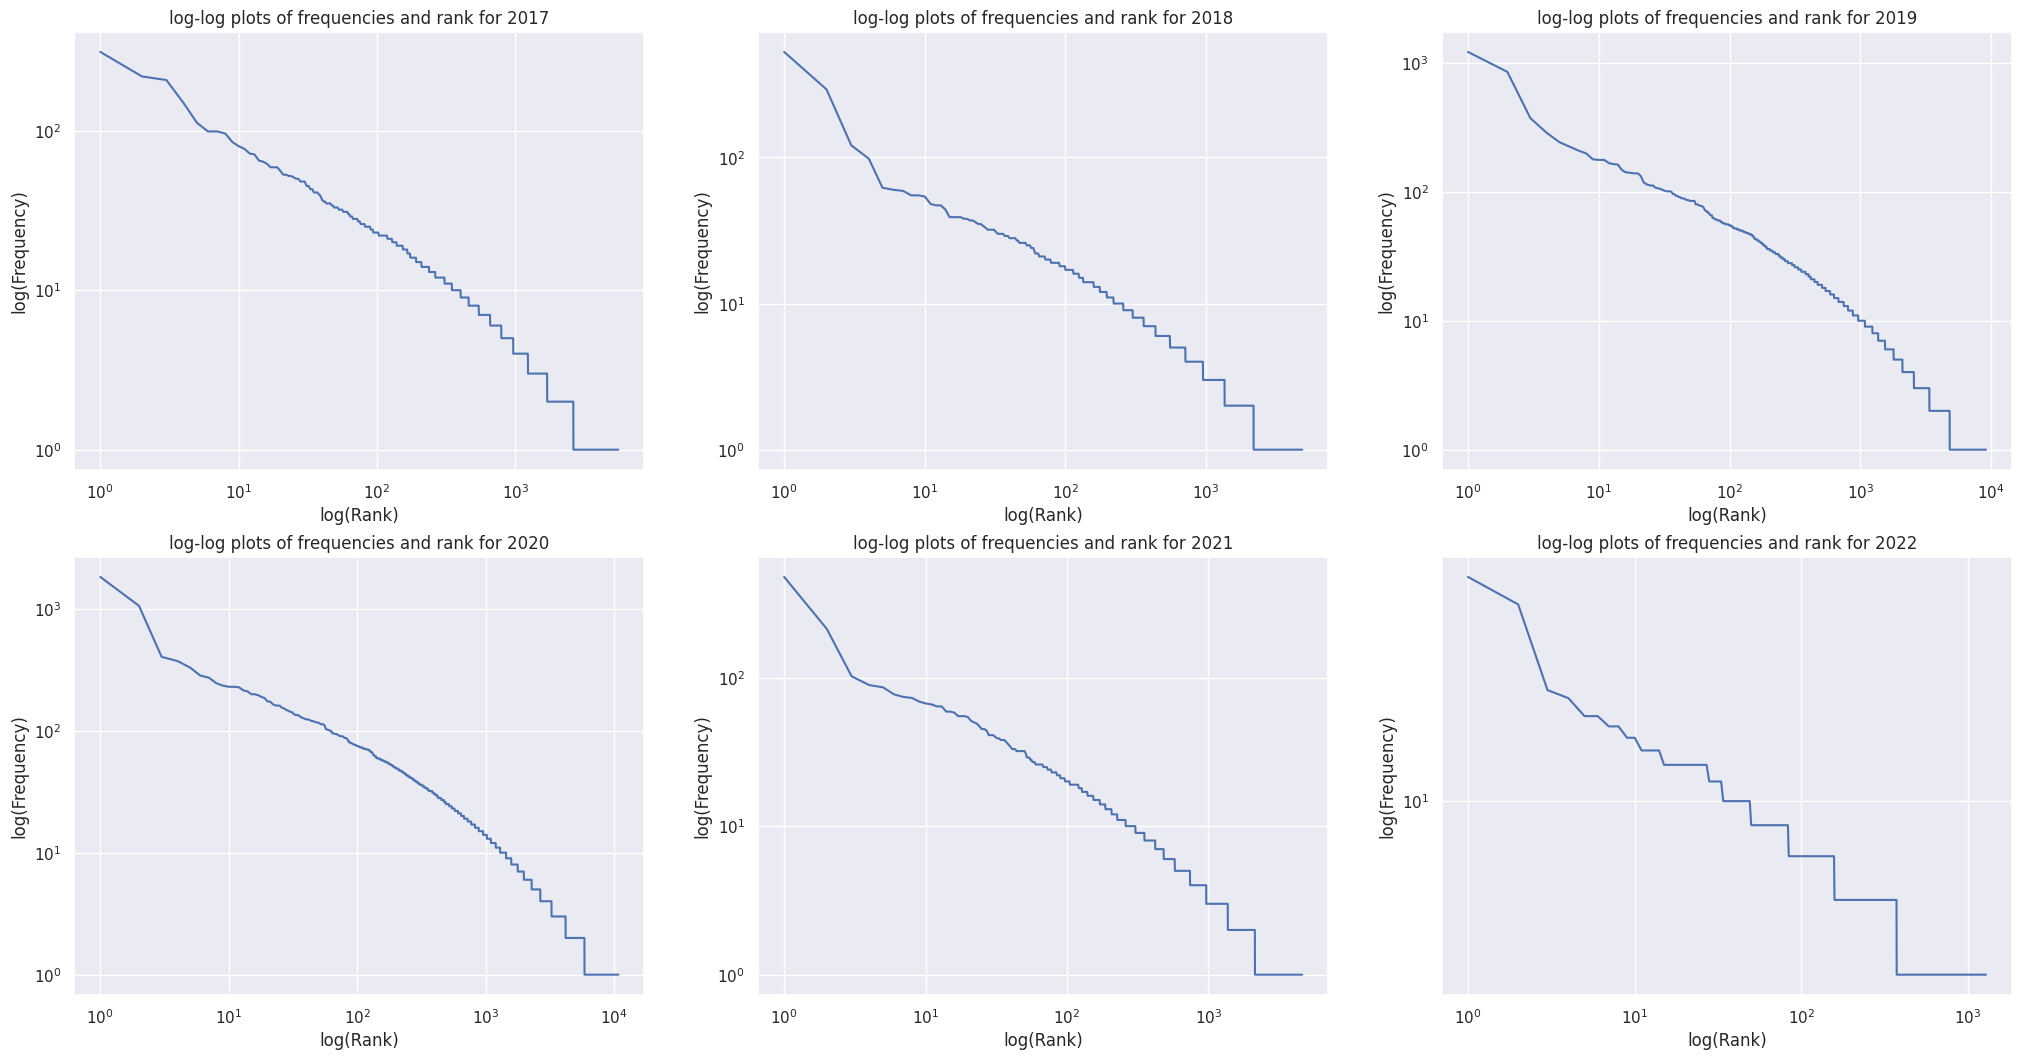

In [39]:
import matplotlib.gridspec as gridspec

# Creating 2x3 sub plots
gs = gridspec.GridSpec(2, 3)

plt.figure(figsize=(25,12.5))
ax = plt.subplot(gs[0, 0])
plt.plot(word_freq_2017_wo_sw['rank'], word_freq_2017_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2017', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[0, 1])
plt.plot(word_freq_2018_wo_sw['rank'], word_freq_2018_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2018', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[0, 2])
plt.plot(word_freq_2019_wo_sw['rank'], word_freq_2019_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2019', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 0])
plt.plot(word_freq_2020_wo_sw['rank'], word_freq_2020_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2020', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 1])
plt.plot(word_freq_2021_wo_sw['rank'], word_freq_2021_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2021', fontsize=12)
plt.xscale('log')
plt.yscale('log')

ax = plt.subplot(gs[1, 2])
plt.plot(word_freq_2022_wo_sw['rank'], word_freq_2022_wo_sw['frequency'])
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('log-log plots of frequencies and rank for 2022', fontsize=12)
plt.xscale('log')
plt.yscale('log')

Differences can be observed for lower values of rank, as most of the time they are stopwords. A difference in scale can also be observed. However, the relationship is somewhat linear, implying that the frequency is inversely proportional to the rank.

# Creating bigram network graphs for each year


---------------- 2017 ----------------
                   bigram  count
0              (model, x)     35
1        (space, station)     25
2          (tesla, model)     23
3         (falcon, heavy)     22
4       (cape, canaveral)     21
5          (upper, stage)     19
6       (climate, change)     19
7       (boring, company)     14
8          (solar, power)     14
9       (rocket, landing)     13
10       (falcon, rocket)     12
11      (rocket, booster)     11
12     (california, time)     11
13         (static, fire)     10
14           (long, term)      9
15     (tesla, solarcity)      9
16        (battery, pack)      9
17        (auto, dealers)      9
18     (software, update)      8
19          (solar, roof)      8
20         (test, flight)      8
21          (launch, pad)      8
22      (boring, machine)      7
23          (tesla, semi)      7
24           (years, ago)      7
25         (boost, stage)      7
26          (dual, motor)      7
27    (highly, recommend)      7
28 

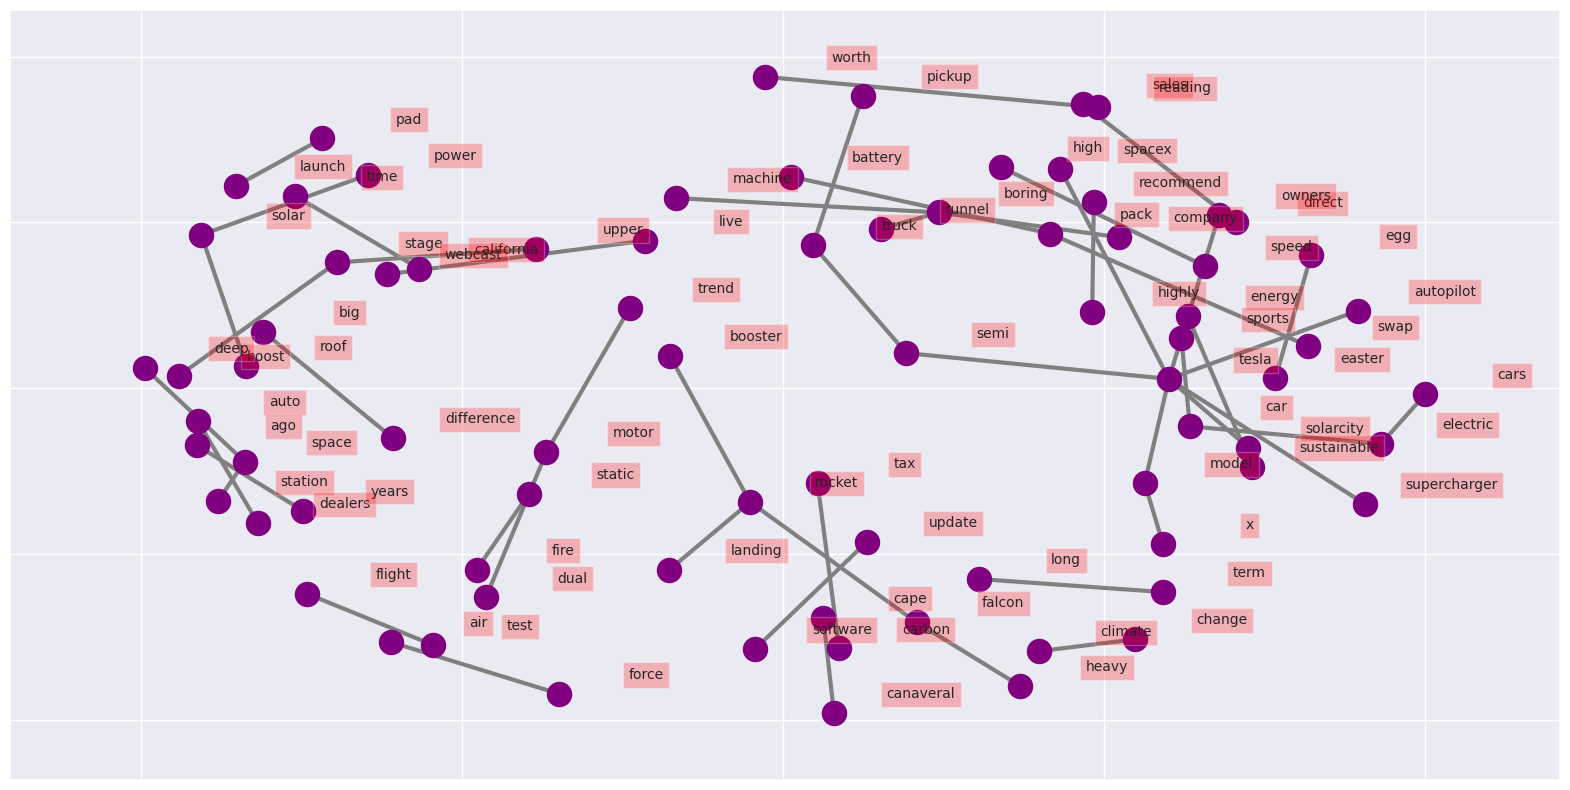


---------------- 2018 ----------------
                   bigram  count
0       (boring, company)     16
1         (falcon, heavy)     14
2           (tesla, team)     11
3           (dual, motor)     11
4           (test, drive)     10
5    (model, performance)     10
6         (tesla, owners)      9
7            (years, ago)      9
8                (amp, x)      9
9        (tesla, service)      8
10           (long, term)      8
11           (model, amp)      8
12           (tesla, amp)      8
13          (high, speed)      7
14         (upper, stage)      7
15       (tesla, factory)      7
16           (front, amp)      7
17           (amp, tesla)      6
18           (mr, steven)      6
19       (north, america)      6
20  (free, supercharging)      6
21    (model, production)      6
22        (electric, car)      5
23          (tax, credit)      5
24       (short, sellers)      5
25      (climate, change)      5
26         (easter, eggs)      5
27           (boring, co)      5
28 

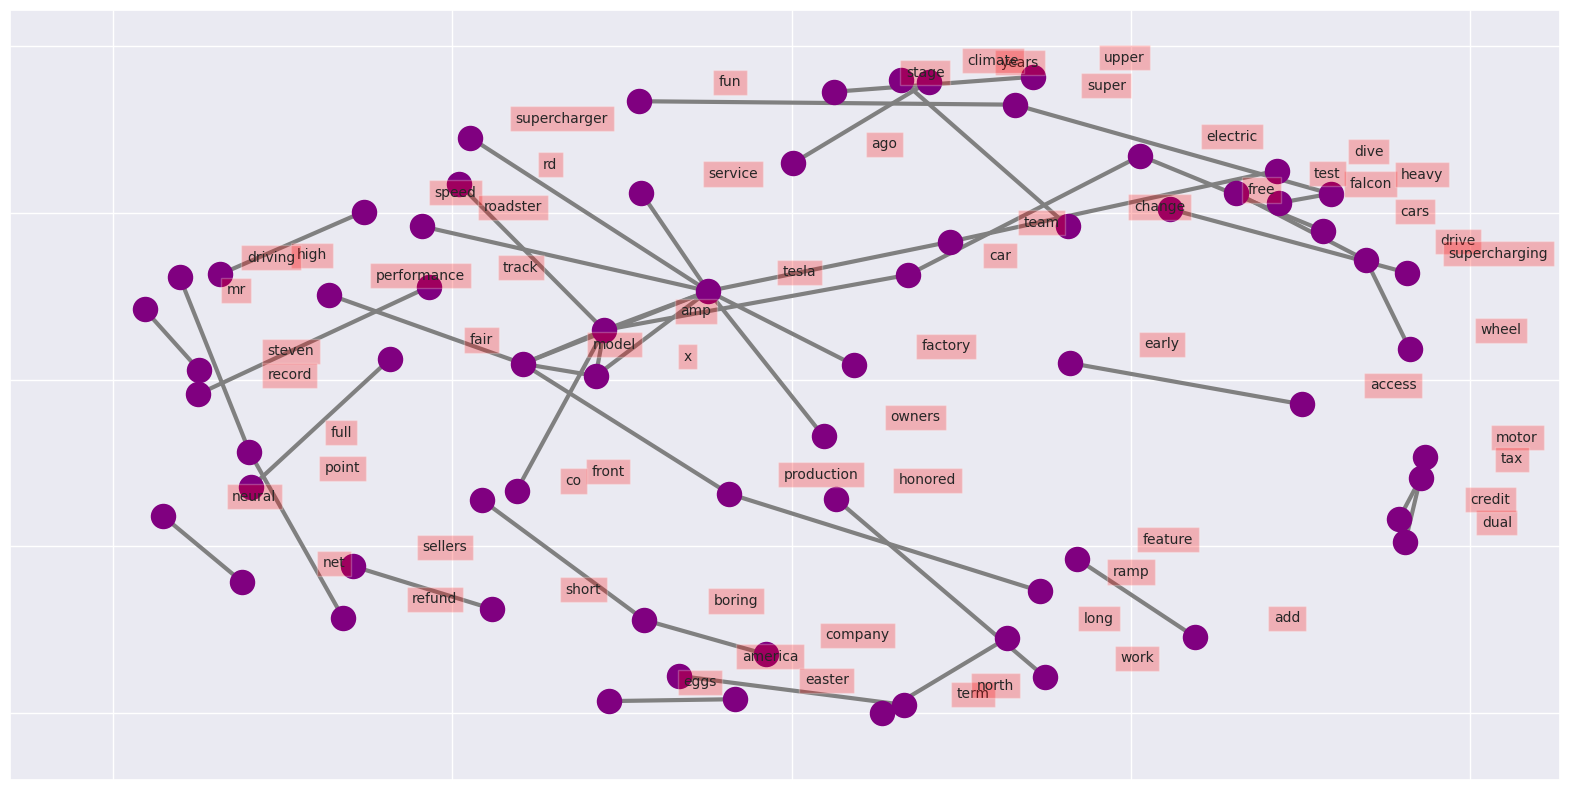


---------------- 2019 ----------------
                   bigram  count
0         (falcon, heavy)     45
1              (model, x)     44
2       (boring, company)     34
3          (tesla, model)     33
4        (space, station)     31
5          (upper, stage)     29
6           (tesla, team)     25
7         (full, driving)     25
8            (long, term)     25
9            (years, ago)     25
10      (cape, canaveral)     25
11      (climate, change)     24
12        (tesla, owners)     23
13        (early, access)     19
14          (dual, motor)     19
15           (tesla, amp)     18
16         (solar, power)     18
17         (super, heavy)     18
18           (amp, tesla)     17
19       (electric, cars)     17
20         (tesla, solar)     16
21       (tesla, service)     16
22       (falcon, rocket)     15
23               (amp, x)     15
24      (rocket, booster)     15
25          (high, speed)     15
26     (software, update)     14
27          (great, work)     14
28 

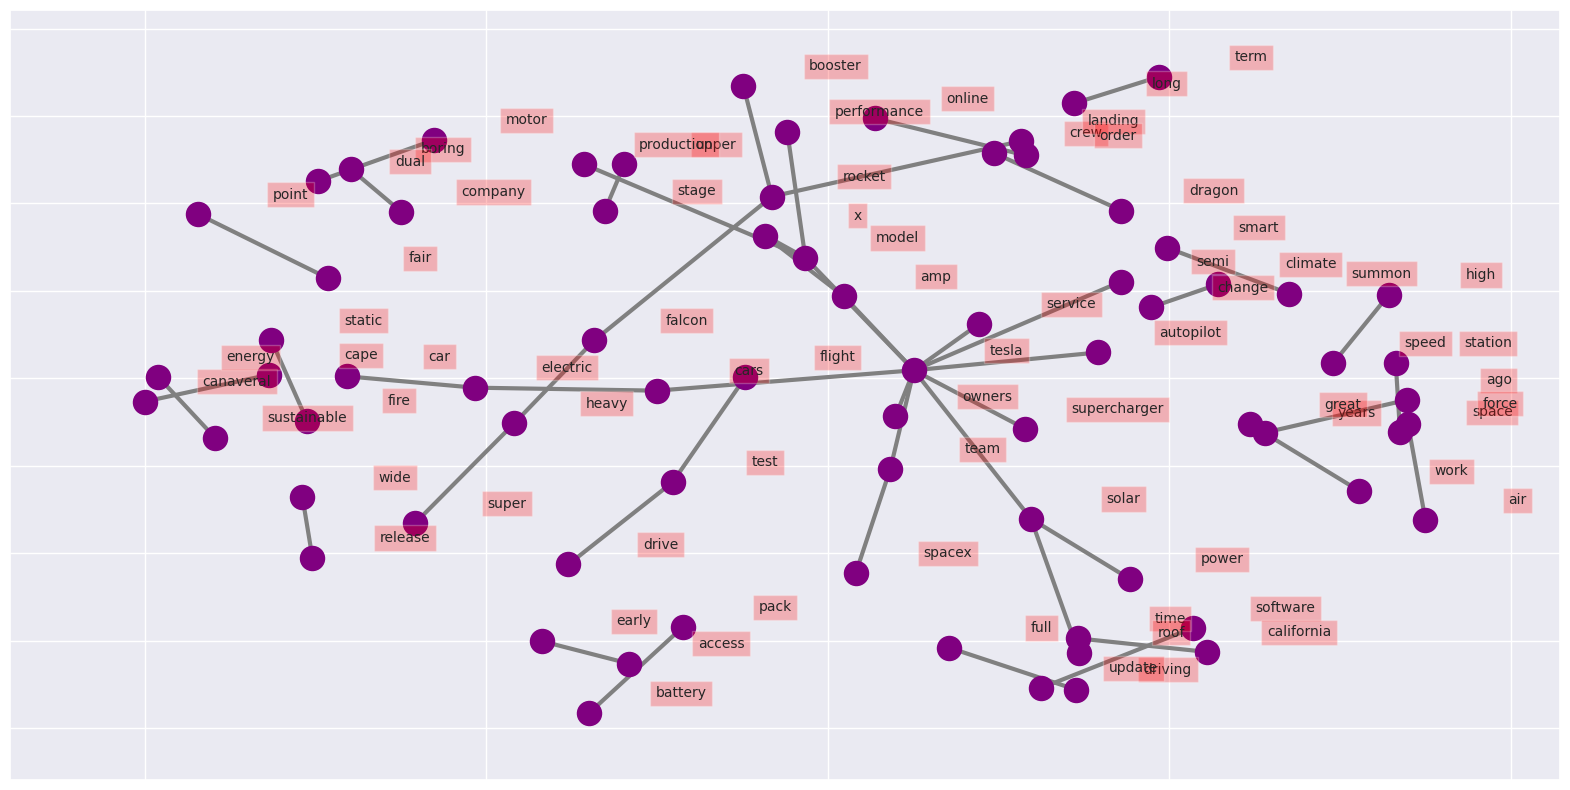


---------------- 2020 ----------------
                    bigram  count
0          (falcon, heavy)     48
1               (model, x)     44
2             (long, term)     37
3        (boring, company)     37
4           (tesla, model)     37
5             (years, ago)     35
6         (space, station)     33
7            (tesla, team)     33
8           (upper, stage)     31
9          (full, driving)     30
10         (tesla, owners)     27
11          (static, fire)     26
12            (amp, tesla)     26
13          (super, heavy)     26
14       (cape, canaveral)     26
15       (climate, change)     25
16           (great, work)     23
17   (sustainable, energy)     22
18            (tesla, amp)     22
19           (dual, motor)     21
20          (solar, power)     21
21        (electric, cars)     20
22         (early, access)     20
23          (giga, berlin)     19
24          (tesla, solar)     19
25      (tesla, autopilot)     18
26          (spacex, team)     18
27      

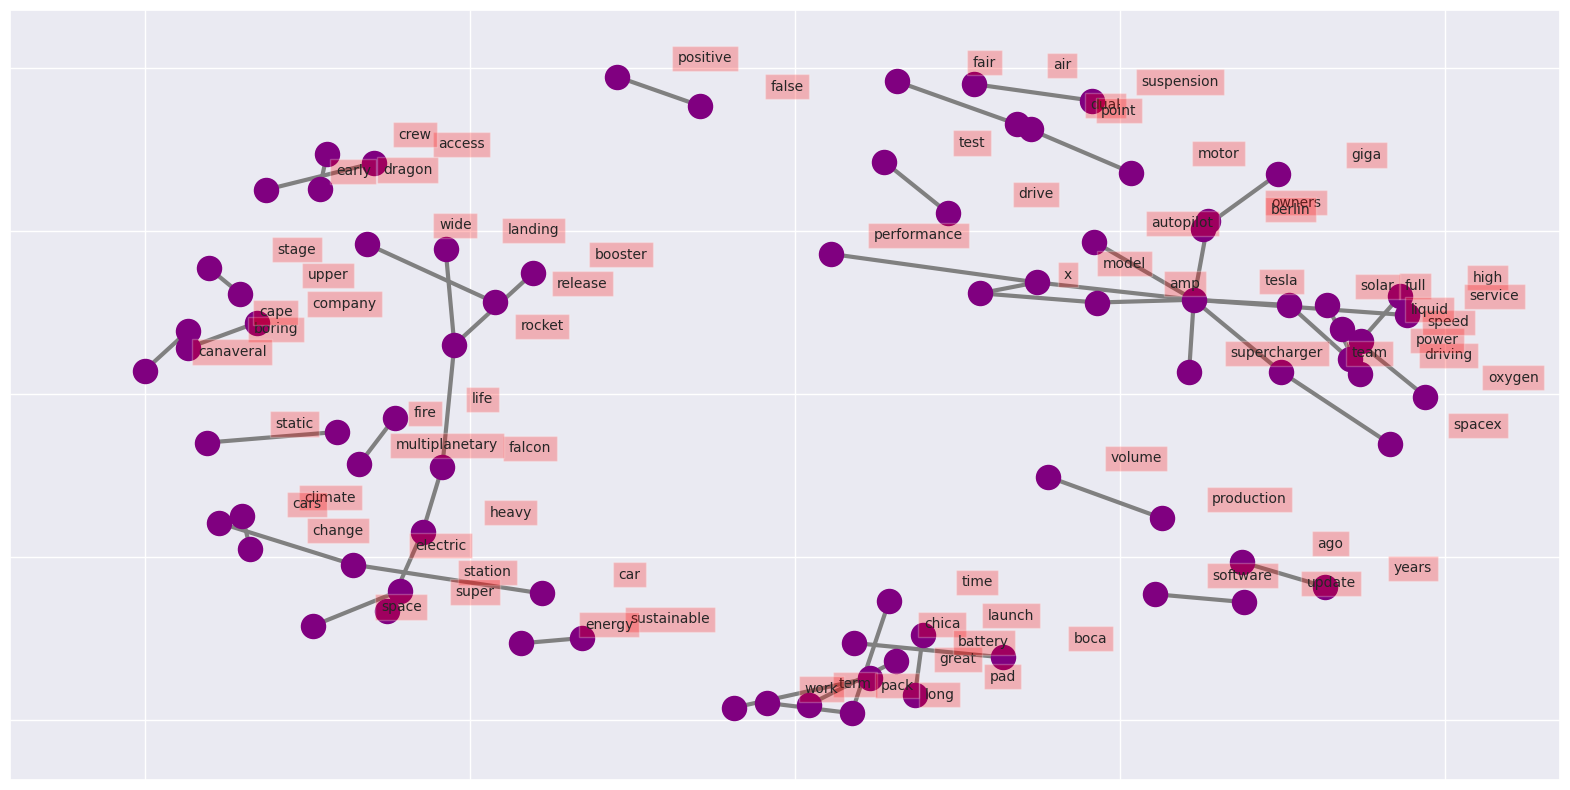


---------------- 2021 ----------------
                    bigram  count
0              (fsd, beta)     21
1             (long, term)     19
2   (life, multiplanetary)     18
3           (pure, vision)     16
4           (super, heavy)     13
5          (supply, chain)     13
6            (real, world)     13
7               (doo, doo)     12
8         (payload, orbit)     10
9             (make, life)     10
10           (great, work)     10
11          (giga, berlin)     10
12   (sustainable, energy)      9
13  (regulatory, approval)      9
14           (tesla, team)      8
15       (production, amp)      8
16       (orbital, launch)      8
17          (model, plaid)      8
18       (energy, density)      8
19      (production, hard)      7
20            (cash, flow)      7
21    (volume, production)      7
22          (making, life)      7
23             (high, bay)      7
24          (tesla, solar)      7
25           (solar, roof)      7
26             (bay, area)      6
27      

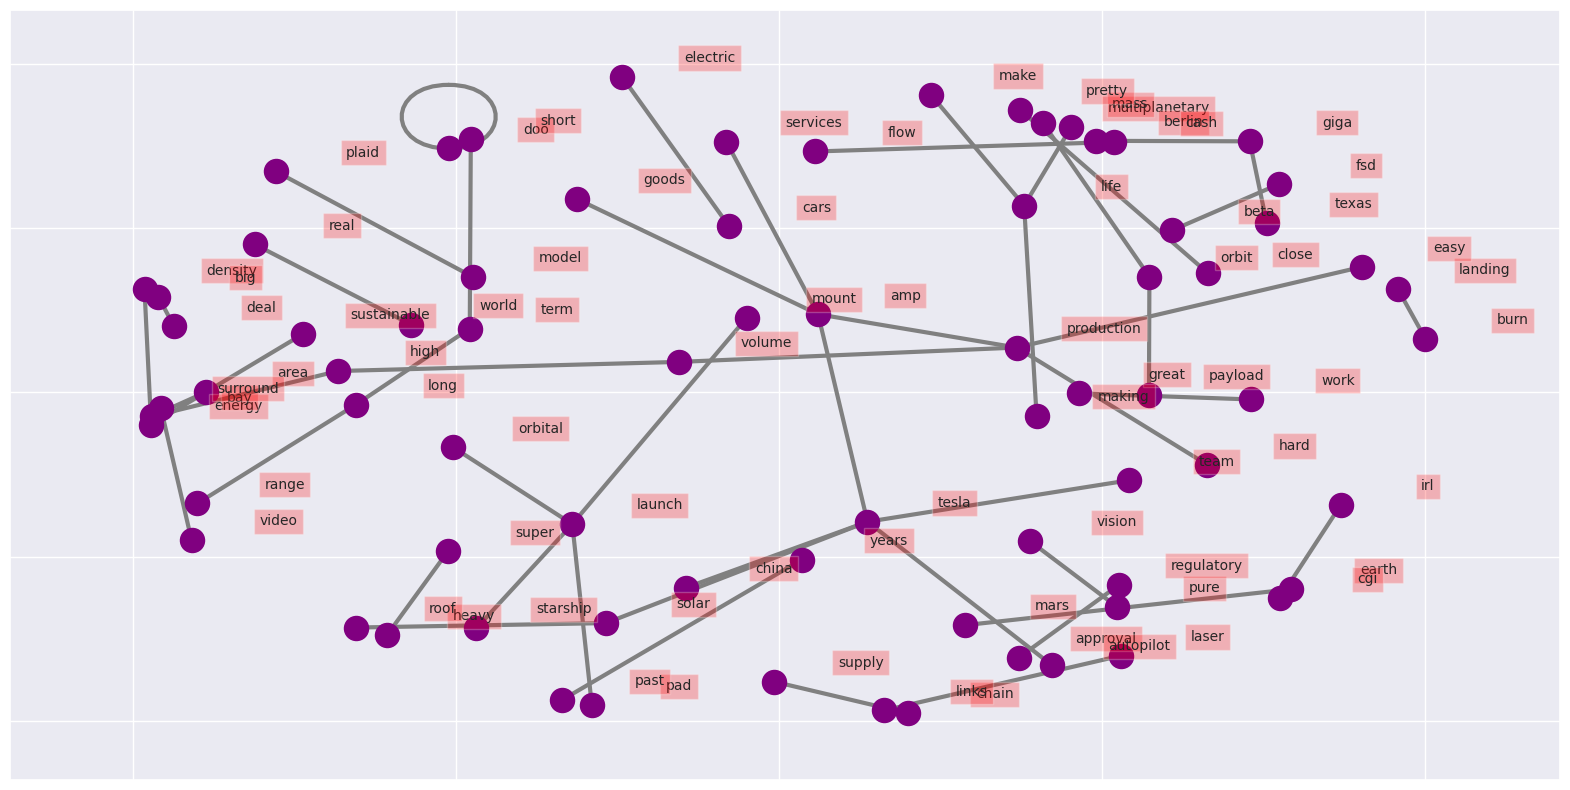


---------------- 2022 ----------------
                    bigram  count
0            (birth, rate)      8
1    (sustainable, energy)      6
2            (work, tesla)      6
3           (neural, nets)      6
4   (life, multiplanetary)      6
5    (starlink, terminals)      4
6          (news, sources)      4
7               (oil, amp)      4
8               (amp, gas)      4
9        (user, terminals)      4
10       (system, working)      4
11         (class, action)      4
12         (phased, array)      4
13             (bay, area)      4
14        (north, america)      4
15    (electric, vehicles)      4
16           (saints, row)      4
17       (links, activate)      4
18          (road, system)      4
19      (system, designed)      4
20             (nets, amp)      4
21     (general, solution)      4
22     (solution, driving)      4
23           (real, world)      4
24   (inference, computer)      4
25  (extremely, difficult)      4
26        (small, changes)      4
27      

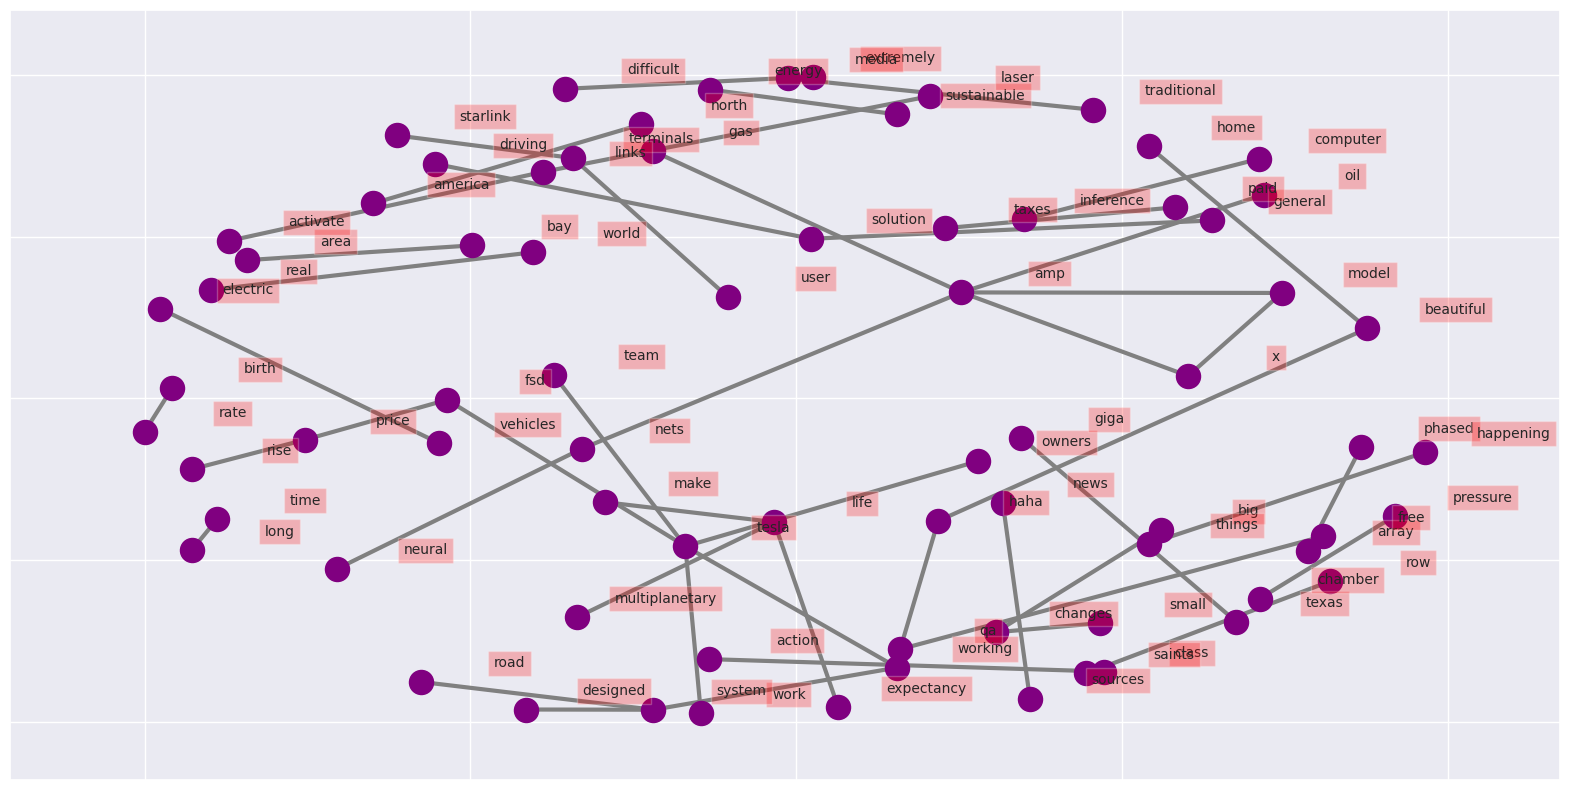

In [40]:
### Considering the tweet token lists of each year without the stopwords
for i in range(2017,2023):
  exec(f"""list1 = list(nltk.bigrams(tweet_tokens_{i}_wo_sw))
import collections
bigram_counts = collections.Counter(list1)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                           columns=['bigram', 'count'])
print()
print('----------------',i,'----------------')
print(bigram_df)
import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=10)

plt.show()""")

# Converting to HTML

In [ ]:
!jupyter nbconvert --to html Exploring-Linguistic-Patterns-Elon-Musks-Tweets-through-NLP-Text-Analysis.ipynb